In [1]:
import h5py
import json
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from reV.handlers.exclusions import ExclusionLayers
from reV.exclusions.exclusions import LayerMask, InclusionMask

excl_h5 = '/Users/mrossol/Git_Repos/reV/tests/data/ri_exclusions/ri_exclusions.h5'

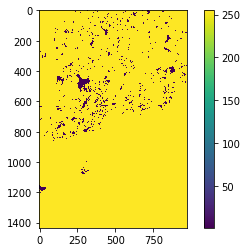

True

In [21]:
with h5py.File(excl_h5, 'r') as f:
    padus = f['ri_padus'][0]

plt.imshow(padus)
plt.colorbar()
plt.show()

with ExclusionLayers(excl_h5) as f:
    test = f['ri_padus']


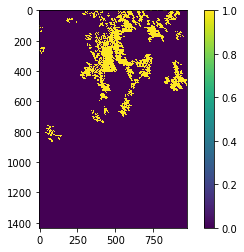

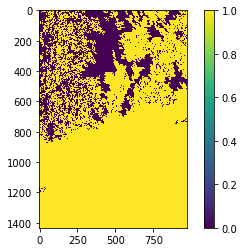

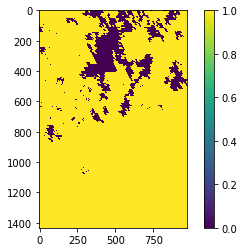

In [23]:
test_dir = '/Users/mrossol/Git_Repos/reV/tests/data/ri_exclusions/'
# Urban PV
layers = {'ri_smod': {'exclude_values': [1,]},
          'ri_srtm_slope': {'inclusion_range':(0, 5)}}

urban_pv = InclusionMask.run_from_dict(excl_h5, layers, min_area=0.018)
plt.imshow(urban_pv.astype(int))
plt.colorbar()
plt.show()

out_path = os.path.join(test_dir, 'urban_pv.npy')
np.save(out_path, urban_pv)


# Rural PV
layers = {'ri_smod': {'include_values': [1,]},
          'ri_srtm_slope': {'inclusion_range':(0, 5)}}

rural_pv = InclusionMask.run_from_dict(excl_h5, layers, min_area=1)
plt.imshow(rural_pv.astype(int))
plt.colorbar()
plt.show()

out_path = os.path.join(test_dir, 'rural_pv.npy')
np.save(out_path, rural_pv)

# Wind
layers = {'ri_smod': {'include_values': [1,]},
          'ri_padus': {'exclude_values': [1,]},
          'ri_srtm_slope': {'inclusion_range':(0, 20)}}

wind = InclusionMask.run_from_dict(excl_h5, layers, min_area=None)
plt.imshow(wind.astype(int))
plt.colorbar()
plt.show()

out_path = os.path.join(test_dir, 'wind.npy')
np.save(out_path, wind)